In [1]:
import pandas as pd
all = pd.read_csv("../data/simulated_conversation.csv", )

In [2]:
all.columns

Index(['Unnamed: 0', 'id', 'en_orig', 'zh_trans', 'en_bt', 'Clinical Risk',
       'Accuracy', 'COMETSrcMetric'],
      dtype='object')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve
sns.set()

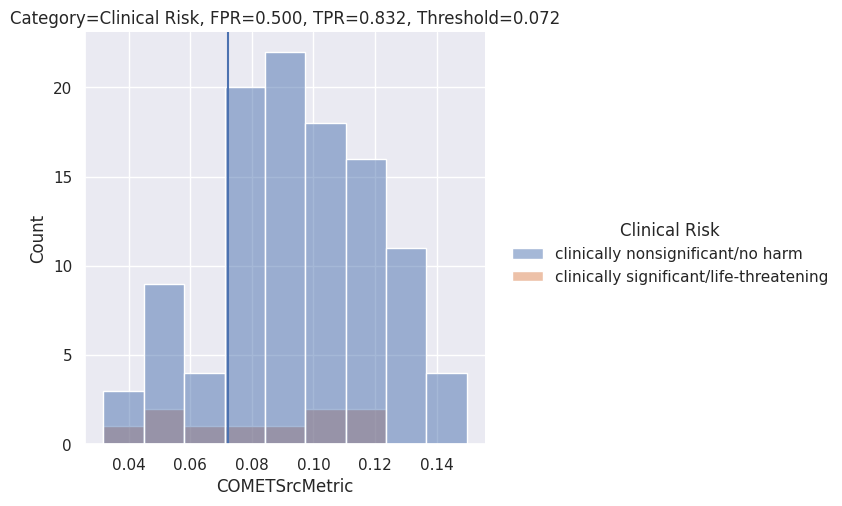

In [4]:
testy = all["Clinical Risk"].replace("clinically nonsignificant/no harm", True).replace("clinically significant/life-threatening", False)
yhat = all["COMETSrcMetric"]
fpr, tpr, thresholds = roc_curve(testy, yhat)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
sns.displot(x=all["COMETSrcMetric"], hue=all["Clinical Risk"])
plt.axvline(x=thresholds[ix])
plt.title('Category=%s, FPR=%.3f, TPR=%.3f, Threshold=%.3f' % ("Clinical Risk", fpr[ix], tpr[ix], thresholds[ix] ))
plt.show()

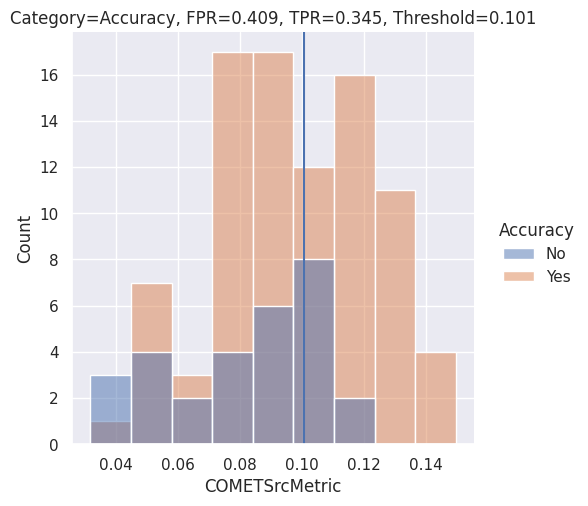

In [5]:
testy = all["Accuracy"].replace("Yes", False).replace("No", True)
yhat = all["COMETSrcMetric"]
fpr, tpr, thresholds = roc_curve(testy, yhat)
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
sns.displot(x=all["COMETSrcMetric"], hue=all["Accuracy"])
plt.axvline(x=thresholds[ix])
plt.title('Category=%s, FPR=%.3f, TPR=%.3f, Threshold=%.3f' % ("Accuracy", fpr[ix], tpr[ix], thresholds[ix] ))
plt.show()
